# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
import pycentroids

In [3]:
pycentroids._pycentroids.omp_info()

{'dynamic': 0, 'num_procs': 64, 'threads_limit': 2147483647, 'threads_max': 64}

In [4]:
help(pycentroids.find_photons)

Help on function find_photons in module pycentroids.pycentroids:

find_photons(images, threshold=200, box=2, pixel_photon=10, pixel_bgnd=15, overlap_max=0, sum_min=800, sum_max=1250, return_pixels='none', return_map=False)



## Load test data

In [5]:
!test -f images.h5 || curl -o images.h5 https://centroids-data.s3.amazonaws.com/images.h5

In [6]:
data = np.asarray(h5py.File('images.h5', 'r')['data'])

In [7]:
data.shape

(40, 1612, 3304)

In [8]:
#large_data = data.copy()
#for i in range(50):
#    large_data = np.concatenate((large_data, data))

In [9]:
pycentroids.find_photons

<function pycentroids.pycentroids.find_photons(images, threshold=200, box=2, pixel_photon=10, pixel_bgnd=15, overlap_max=0, sum_min=800, sum_max=1250, return_pixels='none', return_map=False)>

## Call the fast code for single photon counting

In [10]:
#timeit.timeit("centroids.find_photons(large_data, 400, 2, store_pixels='none')", globals=globals(), number=1)
#pycentroids.find_photons(data, 400, 2, return_pixels='sorted')

In [11]:
df, out, pixels = pycentroids.find_photons(data, 250, 2, sum_max = 1200, sum_min=800,
                                           pixel_photon = 9, pixel_bgnd=20,
                                           return_pixels='unsorted', return_map=True)

In [12]:
df.shape

(818, 22)

In [13]:
if out is not None:
    print(repr(out.shape))

(40, 1612, 3304)


In [14]:
if pixels is not None:
    print(pixels.shape)
    print()
    print(repr(pixels[0]))

(818, 25)

array([156, 157, 161, 154, 156, 174, 152, 179, 182, 159, 154, 177, 638,
       415, 169, 159, 156, 282, 228, 171, 154, 162, 174, 165, 164],
      dtype=uint16)


In [15]:
df = df[df['Fit Outcome'] < 4]
df.shape

(783, 22)

In [16]:
df

,Pixel X,Pixel Y,COM X,COM Y,COR COM X,COR COM Y,Int,Bgnd,Overlap,Fit X,...,Fit Amp,Fit Sigma,Fit Err X,Fit Err Y,Fit Err Bgnd,Fit Err Amp,Fit Err Sigma,Fit Fnorm,Fit Outcome,Fit StdErr
0,524.0,579.0,524.334495,579.191638,524.333667,579.190667,1063.0,154.0,0.0,524.347199,...,242.456924,0.381812,0.046291,0.079483,7.605522,25.849292,0.073929,31.913327,1.0,6.382665
2,704.0,843.0,704.572149,843.184662,704.572000,843.183333,916.8,153.8,0.0,704.490529,...,189.702720,0.390636,0.093276,0.263772,18.102342,64.356339,0.325890,74.442572,3.0,14.888514
3,762.0,871.0,762.540494,870.788576,762.539000,870.787333,1048.8,150.8,0.0,762.403242,...,200.935238,0.363462,0.177393,0.307798,19.307051,69.837633,0.522190,78.724775,1.0,15.744955
4,1581.0,871.0,1580.893756,871.447344,1580.893667,871.447333,989.8,152.8,0.0,1580.627096,...,219.902157,0.528607,0.266681,0.239292,34.225183,148.506192,0.459212,123.326549,1.0,24.665310
5,365.0,872.0,364.800349,872.285092,364.800167,872.284167,1051.0,153.0,0.0,364.680940,...,220.652739,0.395483,0.160422,0.219983,20.550055,71.724582,0.234895,85.236139,3.0,17.047228
6,374.0,872.0,373.955157,872.221525,373.954167,872.220000,1015.8,155.8,0.0,373.878010,...,210.973399,0.356836,0.139204,0.136662,13.667517,44.096423,0.093066,58.528188,1.0,11.705638
7,385.0,872.0,385.213842,871.907720,385.212667,871.906500,1037.6,154.6,0.0,385.232402,...,235.872285,0.376014,0.077446,0.097499,10.164572,33.668888,0.072646,43.098297,3.0,8.619659
9,558.0,872.0,558.288494,872.395939,558.287833,872.394167,1096.4,152.4,0.0,558.267899,...,238.838930,0.343016,0.199213,0.105200,12.575935,43.166443,0.263570,52.548214,3.0,10.509643
10,567.0,872.0,567.362896,871.879638,567.361167,871.879000,1023.8,155.8,0.0,567.217810,...,195.548712,0.322689,0.370952,0.337543,22.419232,73.236813,0.380051,95.565814,1.0,19.113163
11,647.0,872.0,646.811844,872.190405,646.811167,872.188833,1178.8,152.8,0.0,646.609489,...,240.994295,0.409399,0.105964,0.203127,20.983029,72.038004,0.163191,87.669545,3.0,17.533909


## Plot the results 
### Whole image

<IPython.core.display.Javascript object>


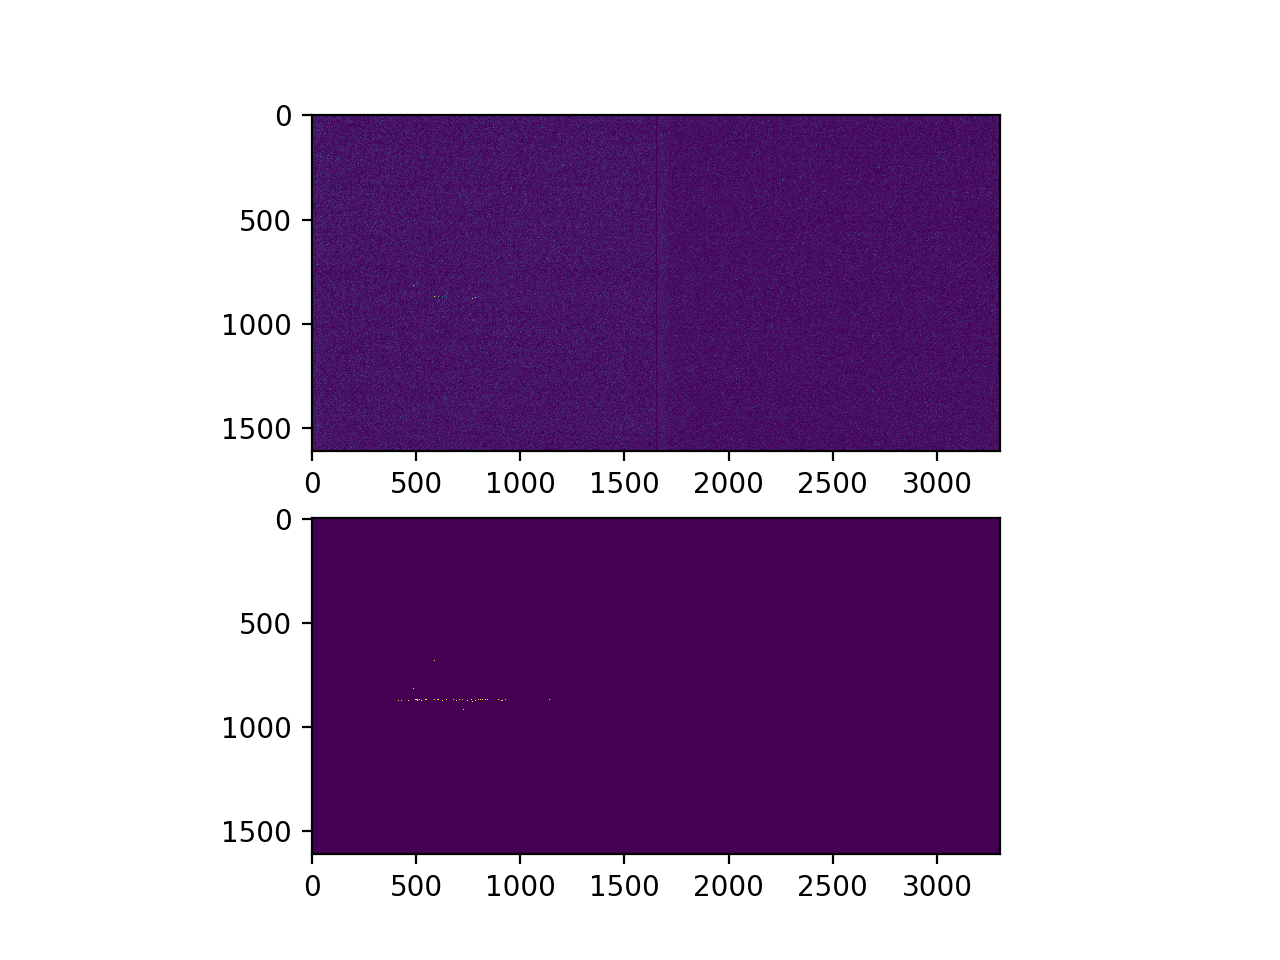

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1], vmin=150, vmax=300)
ax[1].imshow(out[-1]>0)

## Selected part of the image

<IPython.core.display.Javascript object>


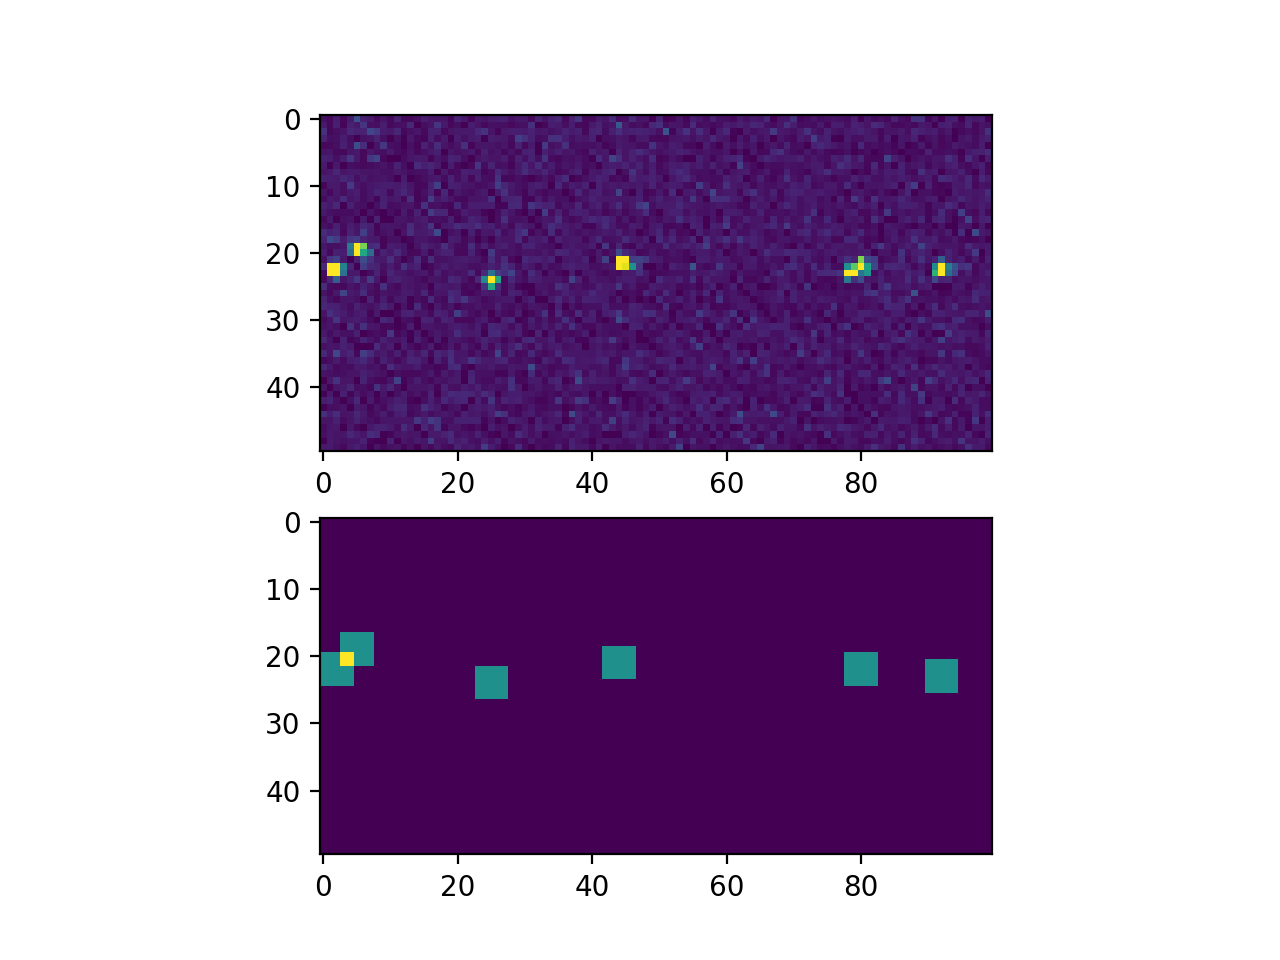

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1,850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[-1,850:900,600:700] & 0xFF)

<IPython.core.display.Javascript object>


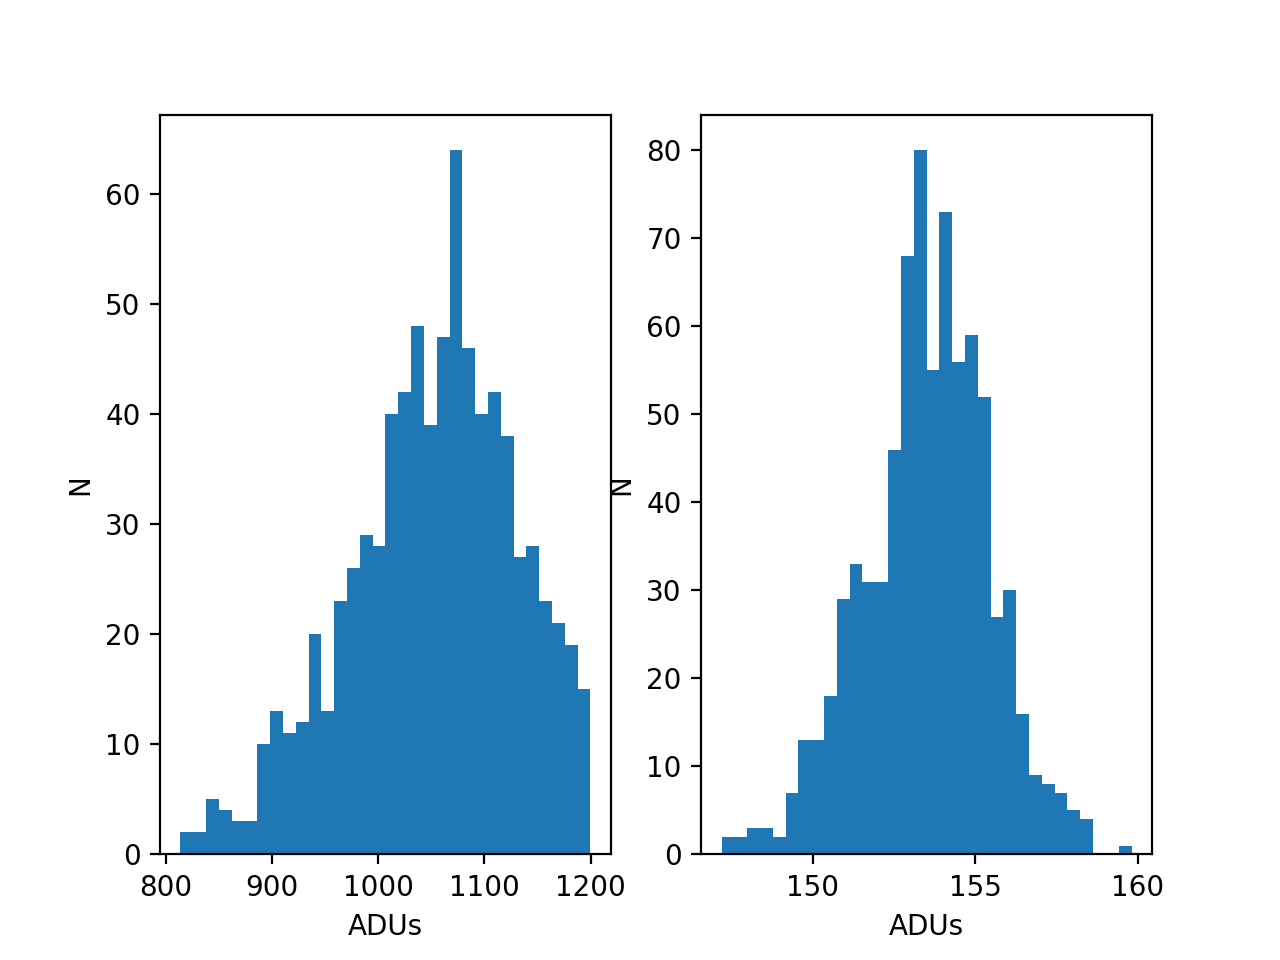

Text(0.5, 0, 'ADUs')

In [19]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df['Int'], bins=32)
ax[0].set_ylabel('N')
ax[0].set_xlabel('ADUs')
ax[1].hist(df['Bgnd'], bins=32)
ax[1].set_ylabel('N')
ax[1].set_xlabel('ADUs')

In [20]:
xfrac = df['COM X'] - np.asarray(df['COM X'], dtype=int)
yfrac = df['COM Y'] - np.asarray(df['COM Y'], dtype=int)
xfrac_fit = df['Fit X'] - np.asarray(df['Fit X'], dtype=int)
yfrac_fit = df['Fit Y'] - np.asarray(df['Fit Y'], dtype=int)

<IPython.core.display.Javascript object>


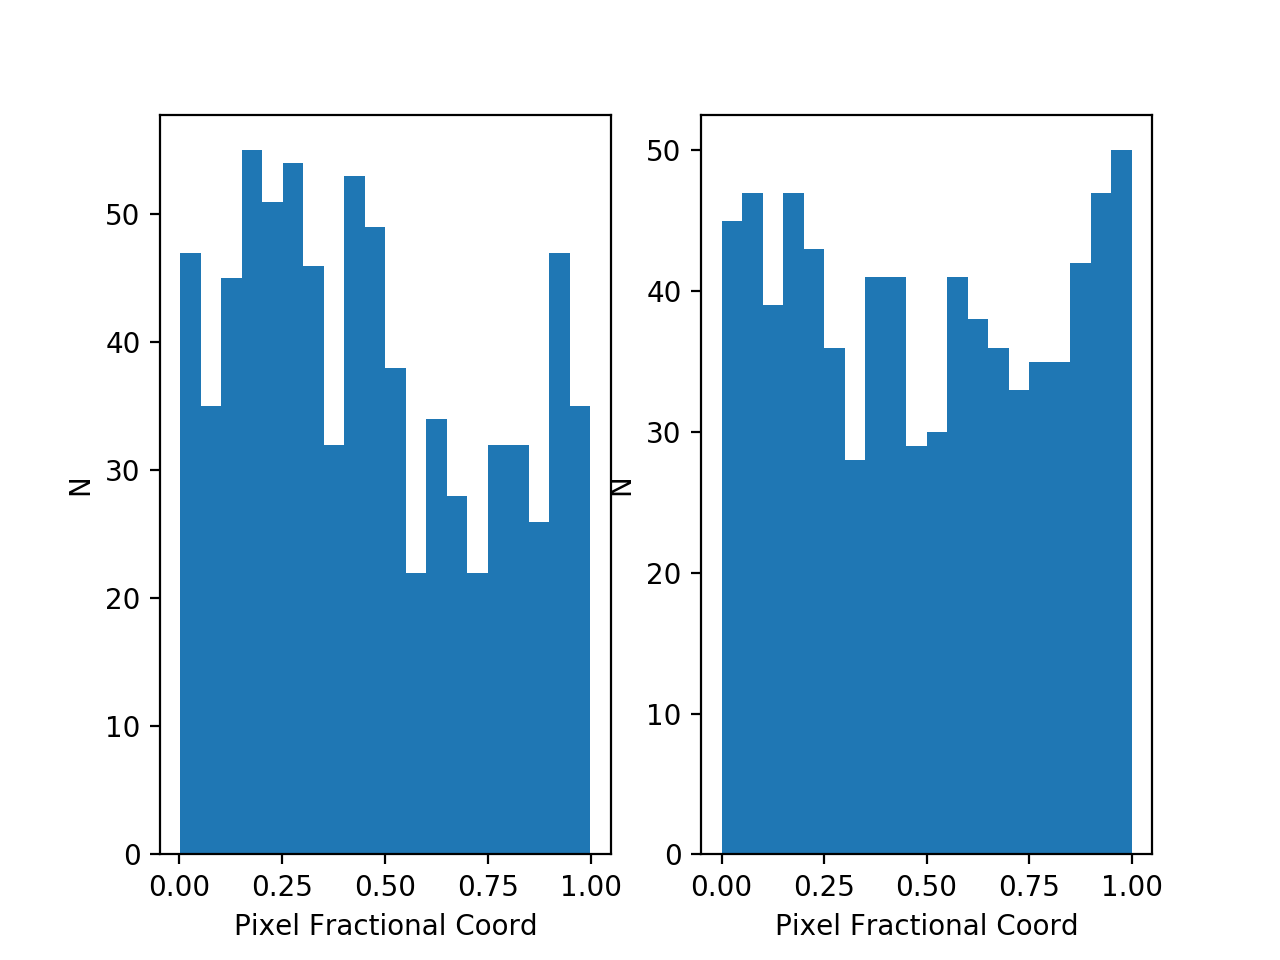

Text(0.5, 0, 'Pixel Fractional Coord')

In [21]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac_fit, bins=20)
ax[1].hist(yfrac_fit, bins=20)
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

<IPython.core.display.Javascript object>


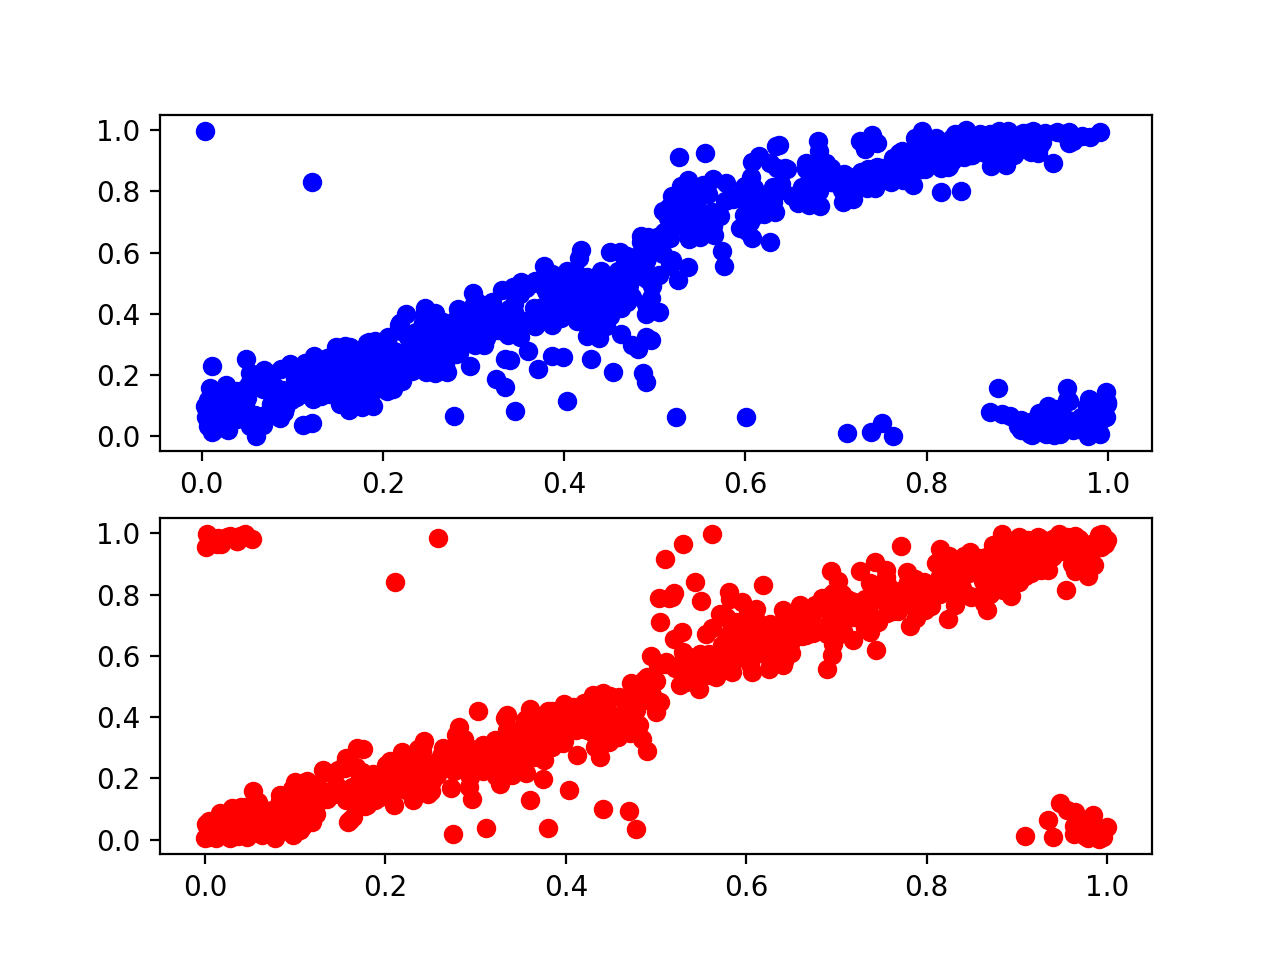

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(xfrac_fit, xfrac, 'bo')
ax[1].plot(yfrac_fit, yfrac, 'ro')

<IPython.core.display.Javascript object>


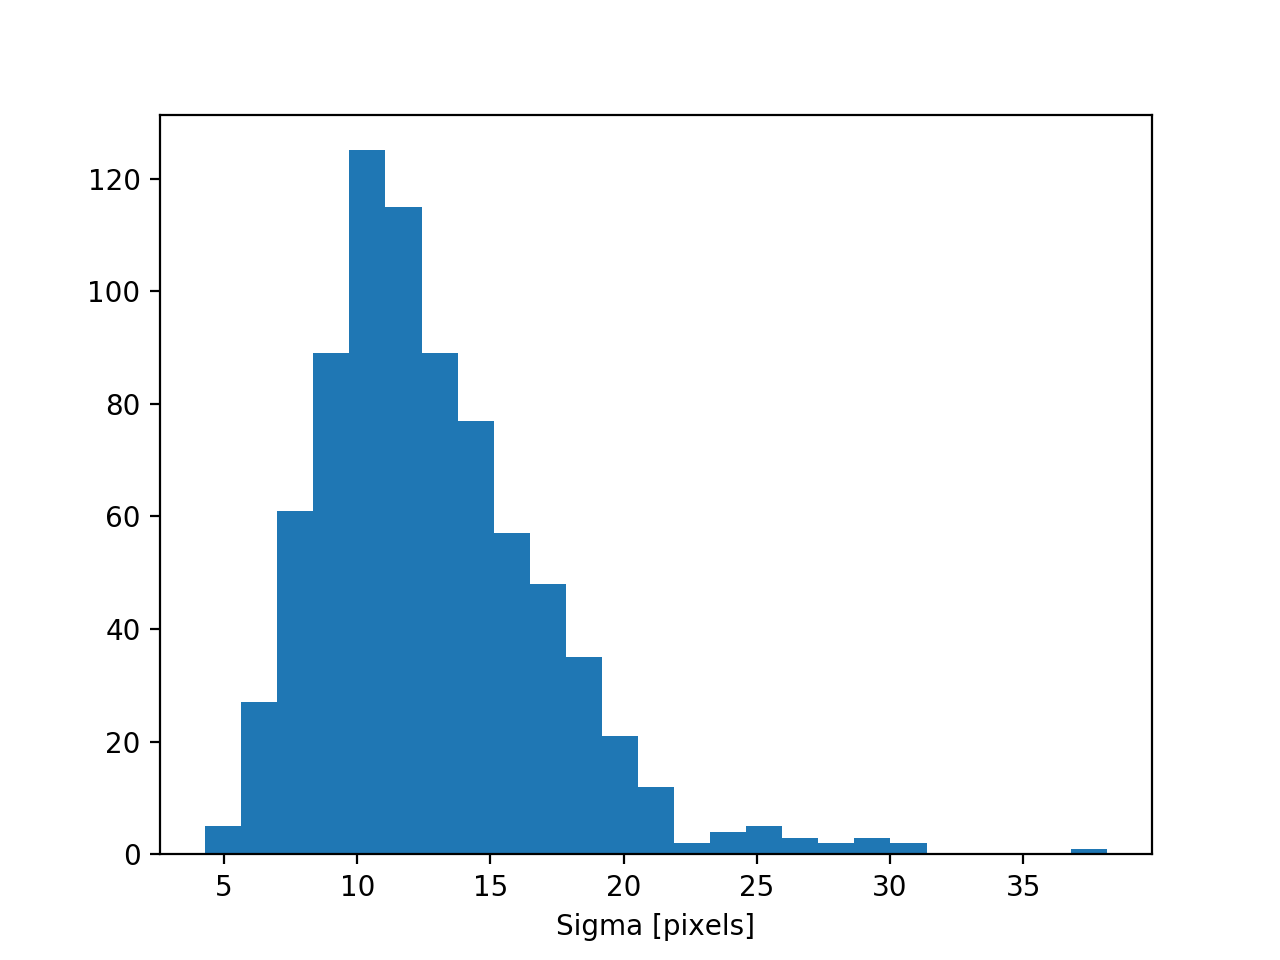

Text(0.5, 0, 'Sigma [pixels]')

In [23]:
fig, ax = plt.subplots(1,1)
ax.hist(df['Fit StdErr'], bins=25)
ax.set_xlabel('Sigma [pixels]')

<IPython.core.display.Javascript object>


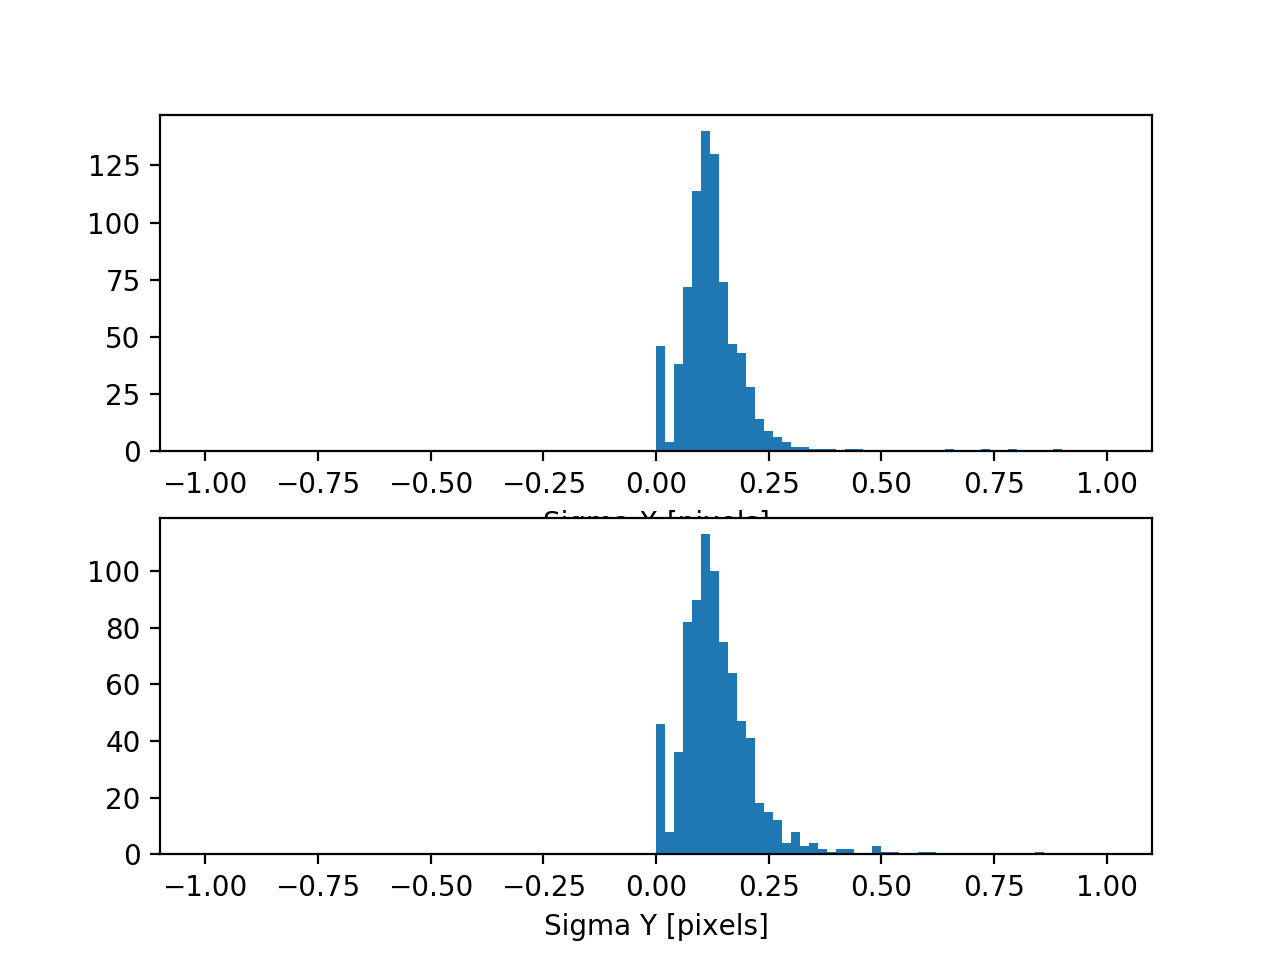

Text(0.5, 0, 'Sigma Y [pixels]')

In [24]:
fig, ax = plt.subplots(2,1)
ax[0].hist(df['Fit Err X'], bins=100, range=(-1,1))
ax[0].set_xlabel('Sigma X [pixels]')
ax[1].hist(df['Fit Err Y'], bins=100, range=(-1,1))
ax[1].set_xlabel('Sigma Y [pixels]')

<IPython.core.display.Javascript object>


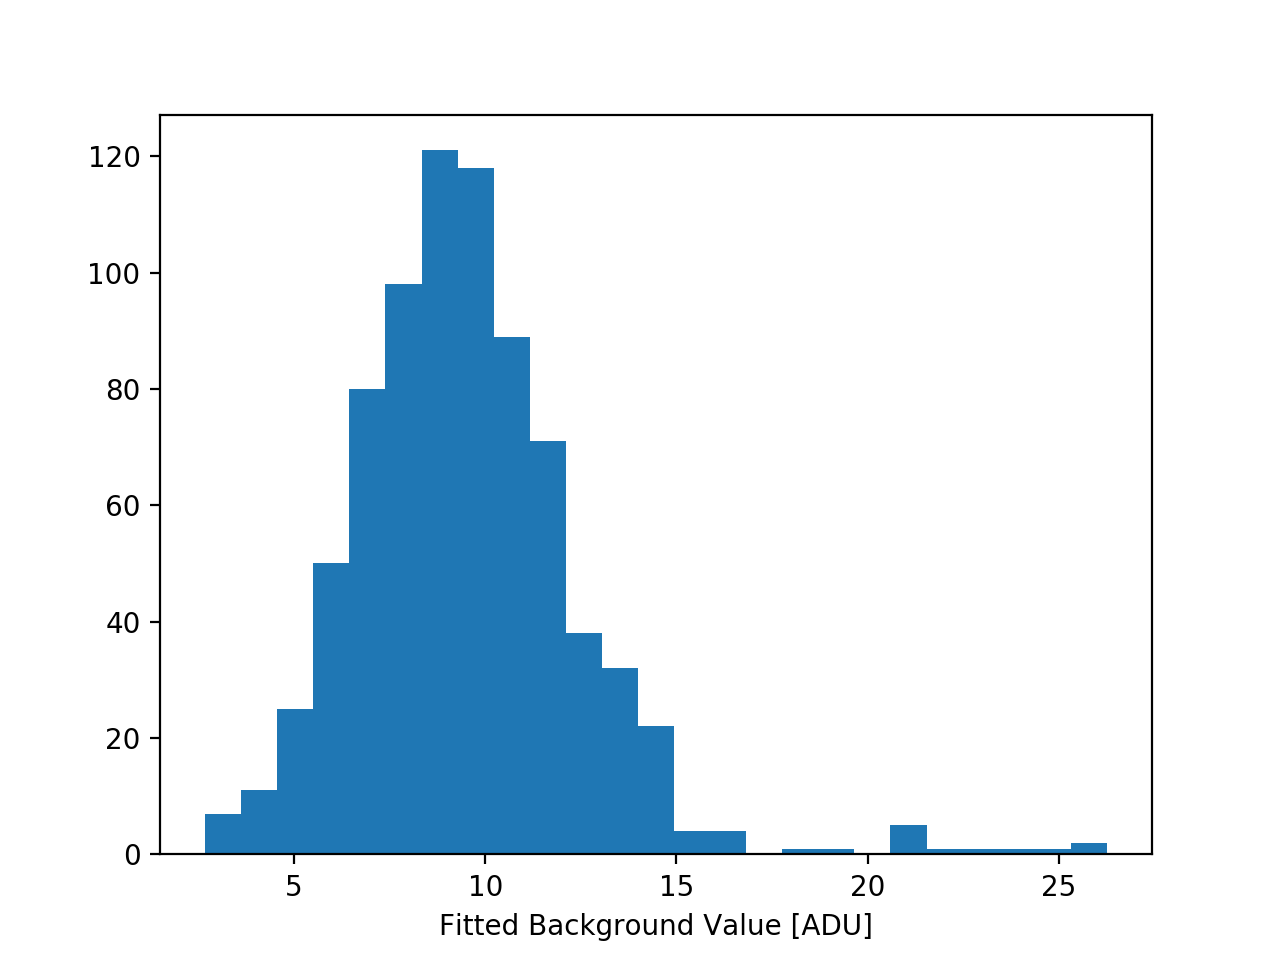

Text(0.5, 0, 'Fitted Background Value [ADU]')

In [25]:
fig, ax = plt.subplots(1,1)
ax.hist(df['Fit Bgnd'], bins=25)
ax.set_xlabel('Fitted Background Value [ADU]')

In [26]:
pycentroids._pycentroids.__version__

'v0.1.6+'